# Ex 2. Low-activity patterns
**2.1.** We now study the capacity of a Hopfield network with stochastic binary neurons and low-activity patterns. This model is proposed in the paper by [Tsodyks and Feigel’man (1988)] and discussed briefly in Chapter 17.2.6 of the book Neuronal Dynamics.

Standard Hopfield model could be described by the following equations:

\begin{equation}
w_{ij} = c \sum_{\mu=1}^{M} p_{i}^{\mu}p_{j}^{\mu}
\end{equation}

\begin{equation}
S_{i}(t+1) = \phi(\sum_{j} w_{ij} S_{j}(t))
\end{equation}
Taking $p_{i}^{\mu} = 2\xi_{i}^{\mu}-1$ we can substitute it into expression (1):
\begin{equation}
    w_{ij} = c \sum_{\mu=1}^{M} (2\xi_{i}^{\mu}-1)(2\xi_{j}^{\mu}-1)
\end{equation}

$$ = 4c \sum_{\mu=1}^{M} (\xi_{i}^{\mu}-\frac{1}{2})(\xi_{j}^{\mu}-\frac{1}{2})$$
$$ = 4c \sum_{\mu=1}^{M} (\xi_{i}^{\mu}-a)(\xi_{j}^{\mu}-b)$$
Hence, from this expression we can deduce that if $a=b=0.5$ with $c^{'}=4c$, we arrive at the Standard Hopfiel model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_patterns(M, N):
    """
    Args:
        M: number of patterns
        N: number of neurons
    Output:
        Generates binary balanced random patterns.
    """
    return np.random.choice([0, 1], size=(M, N))


class StochasticHopfieldNetwork:
    def __init__(self, size, a, b, c, beta=4, theta=0):
        self.size = size
        self.theta = theta  # Threshold for neuron firing
        self.a = a
        self.b = b
        self.c = c
        self.beta = beta
    
    def stochastic_spike_variable(self, state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma
    
    def train(self, patterns, size):
        W = np.zeros((size, size))
        for i in range(size):
            for j in range(size):
                if i != j:
                    W[i, j] = self.c / size * np.sum((patterns[:, i] - self.b) * (patterns[:, j] - self.a))
        #new_S = np.tanh(beta*(W@S - theta))
        return W
    
    def recall(self, state, patterns, steps=5):
        state = np.array(state, dtype=float)  # continuous states initialized with the pattern
        for _ in range(steps):
            sigma = self.stochastic_spike_variable(state) # P{σ_i(t) = +1 | S_i(t)}
            weights = self.train(patterns, self.size)
            continuous_state = np.dot(weights, sigma) - self.theta  
            state = np.tanh(continuous_state*self.beta)  # Stochastic state update
            print("Similarity between the 1st pattern and the current state:", round(np.dot(state,patterns[0,:])/len(state),4))
        for i in range(len(patterns)):
            print("Similarity between the",i+1,"pattern and the current state:", round(np.dot(state,patterns[i,:])/len(state),4))
        #return state

In [3]:
# Example usage:
size = 100
patterns = generate_patterns(10, size)  # Low-activity patterns
# flip 5% of indices
initial_state = patterns[0].copy()
const = 0.05
flip_indices = np.random.choice(len(initial_state), int(size*const), replace=False)
initial_state[list(flip_indices)] *= -1
#print(initial_state==patterns[0])

stochastic_net = StochasticHopfieldNetwork(size, a=0.5, b=0.5, c=4.0, theta=0, beta=4)
stochastic_net.train(patterns, size)
#print(patterns)
recalled = stochastic_net.recall(initial_state,patterns)
#print(recalled)

Similarity between the 1st pattern and the current state: 0.1793
Similarity between the 1st pattern and the current state: 0.2278
Similarity between the 1st pattern and the current state: 0.1927
Similarity between the 1st pattern and the current state: 0.1536
Similarity between the 1st pattern and the current state: 0.1445
Similarity between the 1 pattern and the current state: 0.1445
Similarity between the 2 pattern and the current state: 0.1039
Similarity between the 3 pattern and the current state: 0.2046
Similarity between the 4 pattern and the current state: -0.2406
Similarity between the 5 pattern and the current state: 0.182
Similarity between the 6 pattern and the current state: -0.0675
Similarity between the 7 pattern and the current state: 0.059
Similarity between the 8 pattern and the current state: 0.1973
Similarity between the 9 pattern and the current state: -0.0141
Similarity between the 10 pattern and the current state: 0.0706


### Question
Are we supposed to show with which values we get the same patterns as we do for Hopfield model or would it be enough to just state it?

a=b=0.5, c=4

**2.2.** Write methods for generating random patterns ξμ ∈ {0, 1}N with activity (i.e. average number of
(+1)’s) a, for computing the Hamming distance between new patterns ξμ and new state variables σ, and
for simulating the new model above.

In order to calculate Hamming distance of the random patterns ξμ we need to convert them back into probabilities. We, therefore, use the following formula to find $p_{i}^{\mu}$: $$p_{i}^{\mu} = 2\xi_{i}^{\mu}-1$$

In [4]:
'''
for M in range(1, max_patterns + 1):
            patterns = self.generate_random_patterns(M)
            self.train(patterns)
            initial_state = patterns[0].copy()  # Testing recall for the first pattern
            recalled_state = self.recall(initial_state)
            if np.sum(recalled_state != patterns[0]) / self.size > 0.05:  # Using 10% error rate
                return M - 1  # Return the last successfully recalled number of patterns
        return M
'''

'\nfor M in range(1, max_patterns + 1):\n            patterns = self.generate_random_patterns(M)\n            self.train(patterns)\n            initial_state = patterns[0].copy()  # Testing recall for the first pattern\n            recalled_state = self.recall(initial_state)\n            if np.sum(recalled_state != patterns[0]) / self.size > 0.05:  # Using 10% error rate\n                return M - 1  # Return the last successfully recalled number of patterns\n        return M\n'

In [167]:
def generate_patterns(M, size):
    """
    Args:
        M: number of patterns
        N=size: number of neurons
    Output:
        Generates binary balanced random patterns.
    """
    patterns = np.random.choice([0, 1], size=(M,size))
    a = np.sum(patterns, axis=1) / size
    return a, patterns

#a, patterns = generate_patterns(3, 10)
class StochasticHopfieldNetwork:
    def __init__(self, size, b, c, beta=4, theta=0):
        self.size = size
        self.theta = theta  # Threshold for neuron firing
       #self.a = a
        self.b = b
        self.c = c
        self.beta = beta
    
    def stochastic_spike_variable(self, state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma
    
    def overlap(self, patterns, sigma, a):
        m = np.zeros(patterns.shape[0])
        for i in range(len(m)):
            m[i] = self.c / self.size * np.dot(patterns[i, :] - a[i],sigma)
        return m
    
    def recall(self, state, patterns, a, steps=20):
        state = np.array(state, dtype=float)  # continuous states initialized with the pattern
        for _ in range(steps):
            sigma = self.stochastic_spike_variable(state) # P{σ_i(t) = +1 | S_i(t)}
            overlaps = self.overlap(patterns, sigma, a)
            continuous_state = np.dot((patterns-self.b).T,overlaps) - self.theta  
            state = np.tanh(continuous_state*self.beta)  # Stochastic state update
            #print("Similarity between the 1st pattern and the current state:", round(np.dot(state,patterns[0,:])/len(state),4))
        #for i in range(len(patterns)):
            #print("Similarity between the",i+1,"pattern and the current state:", round(np.dot(state,patterns[i,:])/len(state),4))
        return state
    
    def hamming_distance(self, pattern, state):
        """Calculates the Hamming distance between two states."""
        sigma = np.round(self.stochastic_spike_variable(state))
        return (self.size-np.sum(pattern==sigma))/(2*self.size)

    def compute_capacity(self, generate_patterns):
        M_max = 0
        a, patterns = generate_patterns(100, self.size)
        for mu in range(patterns.shape[0]):
            initial_state = patterns[mu].copy()
            flip_indices = np.random.choice(len(initial_state), int(size*0.05), replace=False)
            initial_state[list(flip_indices)] *= -1
            recalled_state = self.recall(initial_state, patterns, a)
            hamming_dist = self.hamming_distance(patterns[mu], recalled_state)
            print(hamming_dist)
            if hamming_dist < 0.05:
                M_max += 1
        return M_max/self.size
        

In [168]:
# Example usage:
size = 300
a, patterns = generate_patterns(100, size)
stochastic_net = StochasticHopfieldNetwork(size, b=0.5, c=8.0, theta=0, beta=4)

# flip 5% of indices
initial_state = patterns[0].copy()
const = 0.05
flip_indices = np.random.choice(len(initial_state), int(size*const), replace=False)
initial_state[list(flip_indices)] *= -1

recalled = stochastic_net.recall(initial_state,patterns,a)
print(stochastic_net.stochastic_spike_variable(recalled))

[1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1
 1 1 0 1]


What does the hint mean?

**2.3.** Using the parameters a, b, θ that you found in question 2.1, compute the capacity of the network for N = 300.
Is it the same as what you found in the previous section? If not, what do you think is the origin of the discrepancy?

In [169]:
# Parameters
capacity = stochastic_net.compute_capacity(generate_patterns)
# flip 5% of indices
#initial_state = patterns[0].copy()
#const = 0.05
#flip_indices = np.random.choice(len(initial_state), int(size*const), replace=False)
#initial_state[list(flip_indices)] *= -1
# Create the network and compute its capacity
#stochastic_net = StochasticHopfieldNetwork(size, a=a, b=0.5, c=4.0, theta=0, beta=4)
#recalled = stochastic_net.recall(initial_state,patterns)
#capacity = stochastic_net.compute_capacity(patterns, recalled)  # Test with up to 100 patterns
print("Estimated capacity of the network:", capacity)

218
0.13666666666666666
240
0.1
228
0.12
208
0.15333333333333332
202
0.16333333333333333
227
0.12166666666666667
222
0.13
230
0.11666666666666667
218
0.13666666666666666
218
0.13666666666666666
195
0.175
200
0.16666666666666666
214
0.14333333333333334
233
0.11166666666666666
253
0.07833333333333334
244
0.09333333333333334
199
0.16833333333333333
183
0.195
196
0.17333333333333334
217
0.13833333333333334
238
0.10333333333333333
197
0.17166666666666666
222
0.13
238
0.10333333333333333
215
0.14166666666666666
205
0.15833333333333333
217
0.13833333333333334
217
0.13833333333333334
210
0.15
228
0.12
235
0.10833333333333334
249
0.085
229
0.11833333333333333
214
0.14333333333333334
220
0.13333333333333333
237
0.105
243
0.095
220
0.13333333333333333
228
0.12
232
0.11333333333333333
216
0.14
238
0.10333333333333333
226
0.12333333333333334
220
0.13333333333333333
226
0.12333333333333334
205
0.15833333333333333
206
0.15666666666666668
227
0.12166666666666667
239
0.10166666666666667
216
0.14
206
0.

### Questions to TA:
1. When computing Hamming distance, are we computing it between the sigma of the state that we have updated and the random patterns or the sigma of the pattern and the pattern itself (for every pattern)?

**2.4.** For a = b = 0.5, what value of the threshold θ corresponds to the best capacity? Plot the capacity as a function of θ.

In [152]:
# Parameters
N = 300 # number of neurons in patterns
a = 0.1 # Low activity level of 10%
b = 0.5  # No offset for binary patterns
c = 8
beta = 4
theta = np.linspace(0, 10, 20)
capacity = np.zeros(len(theta))

# Create the network and compute its capacity
for i,t in enumerate(theta):
    a, patterns = generate_patterns(10, N)
    network = StochasticHopfieldNetwork(N, a, b, c, beta, theta=t)
    # flip 5% of indices
    initial_state = patterns[0].copy()
    flip_indices = np.random.choice(len(initial_state), int(N*0.05), replace=False)
    initial_state[list(flip_indices)] *= -1

    recalled = network.recall(initial_state,patterns)
    capacity[i] = network.compute_capacity(generate_patterns)  # Test with up to 100 patterns
    #print("Theta:", t, "Estimated capacity of the network:", capacity)
#network = StochasticHopfieldNetwork(N, a, b, beta, theta)
#capacity = network.compute_capacity(100)  # Test with up to 100 patterns
print("Estimated capacity of the network:", capacity)

TypeError: StochasticHopfieldNetwork.__init__() got multiple values for argument 'theta'

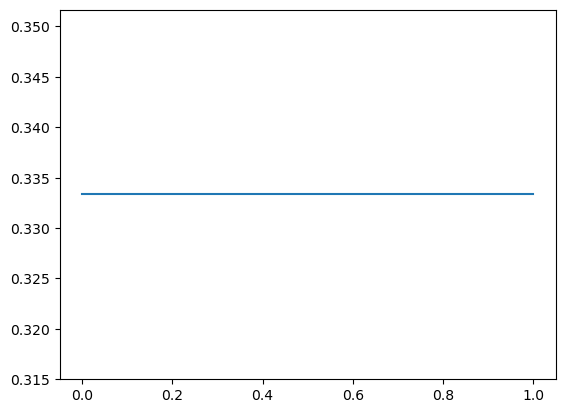

In [255]:
plt.figure()
plt.plot(theta, capacity)

(50, 5)


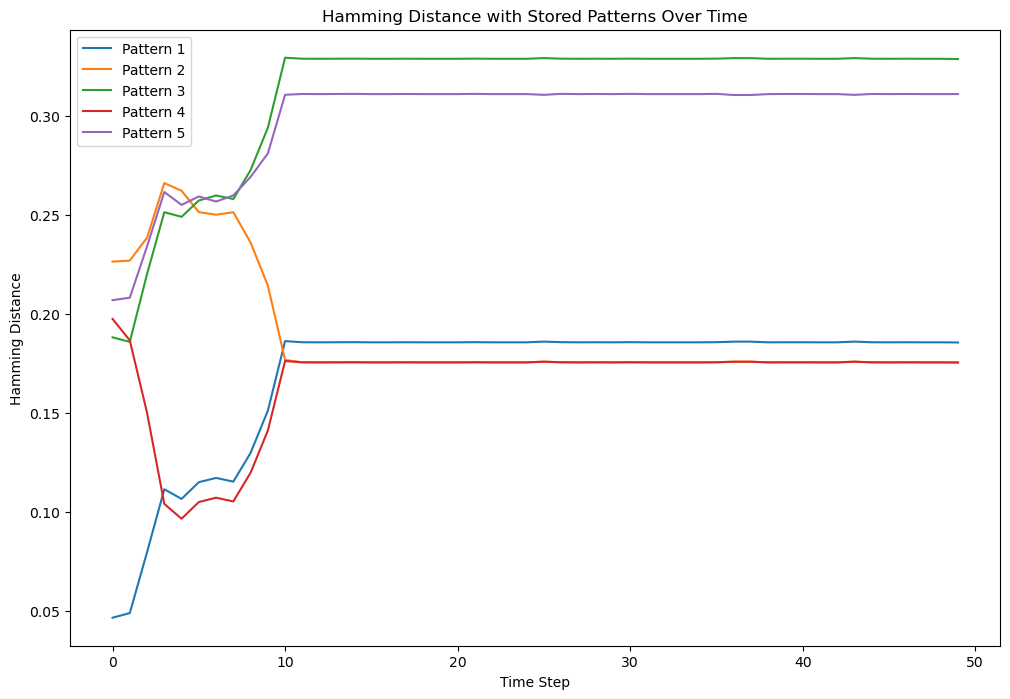

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def stochastic_spike_variable(state):
    firing_probability = 0.5 * (state + 1) 
    sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
    return sigma

def compute_synaptic_weights(patterns, a, b, N):
    """
    Compute synaptic weights using the provided formula.
    """
    M = patterns.shape[0]
    c = 2 / (a * (1 - a))
    term_ij = np.zeros((N, N))
    for mu in range(M):
        xi_mu = patterns[mu]
        term_ij += np.outer(xi_mu - b, xi_mu - a)
    wij = (c / N) * term_ij
    #W = np.zeros((N, N))
    #for i in range(size):
    #    for j in range(size):
    #       W[i, j] = c / N * np.sum((patterns[:, i] - b) * (patterns[:, j] - a))
    #print(W.shape)
    return wij
'''
def activation_function(h, beta=4):
    """
    Activation function phi(h) = tanh(beta * h)
    """
    return np.tanh(beta * h)
'''
def update_network_state(S, weights, theta, beta=4):
    """
    Update the network state based on the weights and current state.
    """
    #h = np.dot(weights, S) - theta
    #new_S = activation_function(h, beta)
    continuous_state = np.dot(weights,S) - theta  
    new_S = np.tanh(continuous_state*beta)
    return new_S

def simulate_network(N, initial_state, weights, theta, beta, iterations=20):
    """
    Simulate the network for a given number of iterations.
    """
    S = initial_state
    for _ in range(iterations):
        S = update_network_state(S, weights, theta, beta)
    return S

def hamming_distance(patterns, state):
    """
    Calculate the overlap between the final state and the stored patterns.
    """
    overlaps = []
    for pattern in patterns:
        #state_adapted = state.copy()
        #state_adapted[state >= 0] = 1
        #state_adapted[state < 0] = -1
        overlap = (N-np.dot(pattern * 2 - 1, state))/(2*N)
        overlaps.append(overlap)
    return overlaps

def simulate_and_record_hamming_distance(N, initial_state, weights, patterns, theta, beta, iterations=20):
    """
    Simulate the network and record the overlaps with stored patterns at each iteration.
    """
    S = initial_state
    ham_dist = np.zeros((iterations, patterns.shape[0]))
    for t in range(iterations):
        S = stochastic_spike_variable(S)
        S = update_network_state(S, weights, theta, beta)
        ham_dist[t] = hamming_distance(patterns, S)
    return ham_dist

# Constants for simulation
N = 300  # Number of neurons
M = 5    # Number of patterns
a = 0.1  # Low activity level
b = 0.1  # Constant b as per project description

# Generate patterns and compute weights
low_activity_patterns = generate_low_activity_patterns(M, N, a)
weights = compute_synaptic_weights(low_activity_patterns, a, b, N)

# Set the initial state close to one of the patterns and simulate
theta = 0.2 # Example threshold
beta = 4     # Example beta value
#initial_state = low_activity_patterns[0] * 2 - 1  # Convert from 0,1 to -1,1 range and use first pattern
# flip 5% of indices
initial_state = low_activity_patterns[0] * 2 - 1
flip_indices = np.random.choice(len(initial_state), int(N*0.05), replace=False)
initial_state[list(flip_indices)] *= -1

# Simulate the network and plot overlaps
iterations = 50
overlaps_time = simulate_and_record_hamming_distance(N, initial_state, weights, low_activity_patterns, theta, beta, iterations)
print(overlaps_time.shape)

# Plotting the overlaps
plt.figure(figsize=(12, 8))
for i in range(overlaps_time.shape[1]):
    plt.plot(overlaps_time[:, i], label=f'Pattern {i+1}')
plt.xlabel('Time Step')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance with Stored Patterns Over Time')
plt.legend()
plt.show()


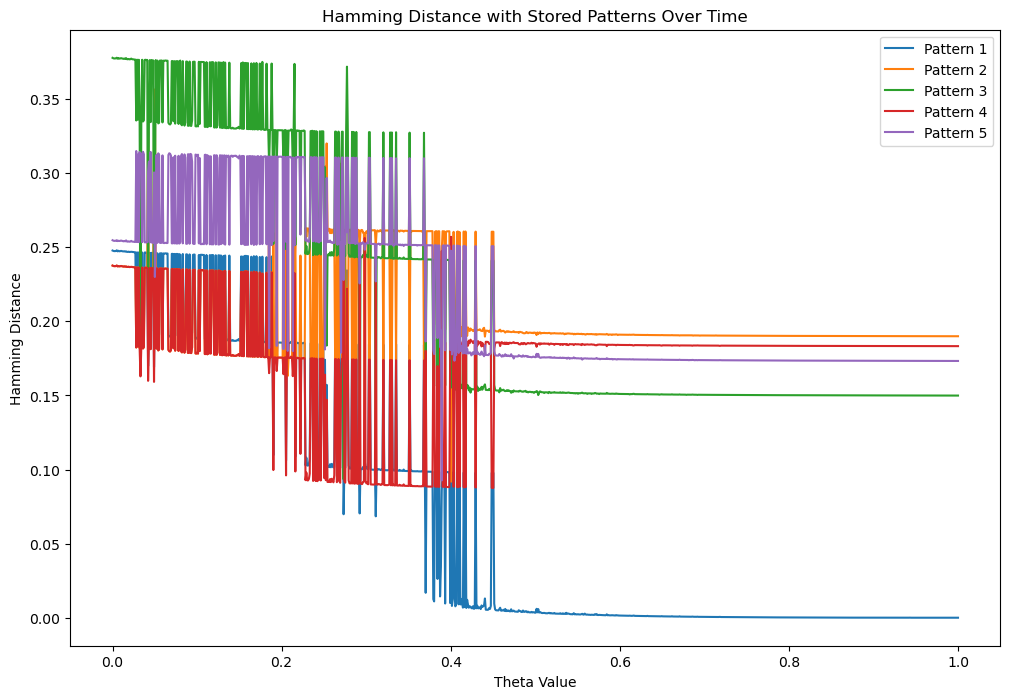

In [98]:
# Constants for simulation
N = 300  # Number of neurons
M = 5    # Number of patterns
a = 0.05  # Low activity level
b = 0.05  # Constant b as per project description
theta_list = np.linspace(0, 1, 1000)  # Threshold values to test

hamming_distance_final_theta = np.zeros((len(theta_list), M))

for i,theta in enumerate(theta_list):
    iterations = 50
    overlaps_time = simulate_and_record_hamming_distance(N, initial_state, weights, low_activity_patterns, theta, beta, iterations)
    hamming_distance_final_theta[i] = overlaps_time[-1,:]

# Plotting the hamming distance for each pattern over theta
plt.figure(figsize=(12, 8))
for i in range(hamming_distance_final_theta.shape[1]):
    plt.plot(theta_list,hamming_distance_final_theta[:,i], label=f'Pattern {i+1}')
plt.xlabel('Theta Value')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance with Stored Patterns Over Time')
plt.legend()
plt.show()

## Draft

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def compute_synaptic_weights(patterns, a, b, N):
    """
    Compute synaptic weights using the provided formula.
    """
    M = patterns.shape[0]
    c = 2 / (a * (1 - a))
    term_ij = np.zeros((N, N))
    for mu in range(M):
        xi_mu = patterns[mu]
        term_ij += np.outer(xi_mu - b, xi_mu - a)
    wij = (c / N) * term_ij
    return wij

def activation_function(h, beta=4):
    """
    Activation function phi(h) = tanh(beta * h)
    """
    return np.tanh(beta * h)

def update_network_state(S, weights, theta, beta):
    """
    Update the network state based on the weights and current state.
    """
    h = np.dot(weights, S) - theta
    new_S = activation_function(h, beta)
    return new_S

def simulate_network(N, initial_state, weights, theta, beta, iterations=20):
    """
    Simulate the network for a given number of iterations.
    """
    S = initial_state
    for _ in range(iterations):
        S = update_network_state(S, weights, theta, beta)
    return S

def check_pattern_retrieval(patterns, state):
    """
    Calculate the overlap between the final state and the stored patterns.
    """
    overlaps = []
    for pattern in patterns:
        overlap = np.dot(pattern * 2 - 1, state) / N
        overlaps.append(overlap)
    return overlaps

def simulate_and_record_overlaps(N, initial_state, weights, patterns, theta, beta, iterations=20):
    """
    Simulate the network and record the overlaps with stored patterns at each iteration.
    """
    S = initial_state
    overlaps = np.zeros((iterations, patterns.shape[0]))
    for t in range(iterations):
        S = update_network_state(S, weights, theta, beta)
        overlaps[t] = check_pattern_retrieval(patterns, S)
    return overlaps

# Constants for simulation
N = 300  # Number of neurons
M = 5    # Number of patterns
a = 0.1  # Low activity level
b = 0.1  # Constant b as per project description

# Generate patterns and compute weights
low_activity_patterns = generate_low_activity_patterns(M, N, a)
weights = compute_synaptic_weights(low_activity_patterns, a, b, N)

# Set the initial state close to one of the patterns and simulate
theta = 0.1  # Example threshold
beta = 4     # Example beta value
initial_state = low_activity_patterns[0] * 2 - 1  # Convert from 0,1 to -1,1 range and use first pattern

# Simulate the network and plot overlaps
iterations = 50
overlaps_time = simulate_and_record_overlaps(N, initial_state, weights, low_activity_patterns, theta, beta, iterations)

# Plotting the overlaps
plt.figure(figsize=(12, 8))
for i in range(overlaps_time.shape[1]):
    plt.plot(overlaps_time[:, i], label=f'Pattern {i+1}')
plt.xlabel('Time Step')
plt.ylabel('Overlap')
plt.title('Overlap with Stored Patterns Over Time')
plt.legend()
plt.show()
